#                    Spectral components in (seismic) time series

## 0 Preliminaries

**TINKER:** To fire up the Python environment used below, click (somewhere) in the next cell and
* _hit `shift+enter` together_
* _or click on the `>| Run` button in the menu on the top of the page._

Then the value of $\pi$ should be displayed below the cell, `pi = 3.14159`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import auxiliary_functions as auxf
%matplotlib inline
# work with N samples; build n-vector and cos/sin argument used below
N = 100; n = np.arange(0,N); argument = 2*np.pi*n/N
# make target time series
dataargument = 3*argument
data = np.cos(dataargument)
print('pi = %g'%(np.pi))

pi = 3.14159


## 1 Introduction

Using the _Fourier Transform_ (FT) the information carried in a time series is often better studied in the _frequency domain_ or _spectral domain_, and the manipulation of time series in the broad context of signal processing is also often easier in the spectral domain (**left**). The figures show example applications and (amplitude) spectra from earthquake source studies (**center**) and global seismology (**right**).

<img src="./figure_examplespectra.png" alt="Drawing" style="width: 950px;"/>

## 2 The Discrete Fourier Transform DFT

This figure introduces the application of the DFT to a $N=16$ point long time series for its decomposition into a suite of nine cosine and sine amplitude weights:
<img src="./figure_DFTterminology_timefrequencydomain.png" alt="Drawing" style="width: 500px;"/>

The decomposition is further illustrated by showing an example time series and the associated nine 16 samples long properly weighted cosine and sine functions:
<img src="./figure_decompositionsynthesis_cosinesinewaves.png" alt="Drawing" style="width: 900px;"/>

### 2.1 The forward DFT or analysis equations

In session 03 we obtained a spectrum using a linear **regression** between the data and period dependent test functions (by iterating, i.e., using loops, over these periods) that are linear combinations of weighted sine and cosine functions. From there is only a small step to the DFT. The fitting or regression part of the analysis that yielded the sine and cosine weights is replaced by the DFT analysis equations. These work by **correlation**. As we will again see in session 06, "to detect a known waveform contained in another signal, multiply the two and add the points in the resulting product, and this single number is a measure of how similar the two signals are" (from DSP guide chapter 8). The analysis equations are (DSP guide eq 8-4)
\begin{eqnarray}
\mathrm{Re}(X_k) & = &\quad\sum_{n=0}^{N-1}x_n\cos(2\pi k n /N)\\
\mathrm{Im}(X_k) & = &\,-\sum_{n=0}^{N-1}x_n\sin(2\pi k n /N),
\end{eqnarray}

where the left-hand-side contains the frequency (f) domain signals to be calculated from the time (t) series $x$. Indices $k$ and $n$ correspond to the f- and t-domain. The t-domain signal has $N$ points ($N$ even; $n$ running from $0$ to $N-1$), and the f-domain signal has $N/2+1$ points ($k$ runs from $0$ to $N/2$, NOT to $N/2-1$).

In terms of **frequency** f (in 1/s), these expressions are written 
\begin{eqnarray}
\mathrm{Re}(X_f) & = &\quad\sum_{t=0}^{T}x_n\cos(2\pi f t /T)\\
\mathrm{Im}(X_f) & = &\,-\sum_{t=0}^{T}x_n\sin(2\pi f t /T),
\end{eqnarray}

where t (in s) is the time vector (consisting of $N$ samples), and T (in s) is the length of the time series.

Using Euler's relation 
\begin{equation}
e^{\pm i \theta} = \cos \theta\pm i \sin \theta
\end{equation}
the analysis equation is expressed in terms of complex exponentials ($X_k$ is complex)
\begin{equation}
X_k = \sum_{n=0}^{N-1}x_n e^{-2\pi ik n /N}
\end{equation}

### 2.2 The amplitude (and phase) spectrum


The $\mathrm{Re}(X_k)$ and $\mathrm{Im}(X_k)$ values obtained with the analysis equation have to be converted to the amplitude (or magnitude) $A$ and phase $\phi$ spectrum. The equations are\
\begin{eqnarray}
A_k=\sqrt{\mathrm{Re}(X_k)^2 + \mathrm{Im}(X_k)^2}\\
\phi_k = \mathrm{arctan} \left(\frac{\mathrm{Im}(X_k)}{\mathrm{Re}(X_k)}\right)
\end{eqnarray}
The spectral amplitudes in the Introduction are the amplitude spectrum.

## 3 Hands on!

### Task 1: Frequency

Here we work with the sample representation $kn/N$ to understand the association between $k$ and frequency.

We explore the effect of the frequency-value $k$ on the similarity of the cosine and sine basis or test functions to a sinusoidal data time series (the $x_n$ from above; plotted in gray).

**TINKER:** _Choose different $k$ values (integers! start with 0) to explore the effect on the cosine and sine test functions._
* _Note the values for Re(X_k) and Im(X_k) printed below the figures._
* _What do they tell you about the similarity between data and basis/test functions?_

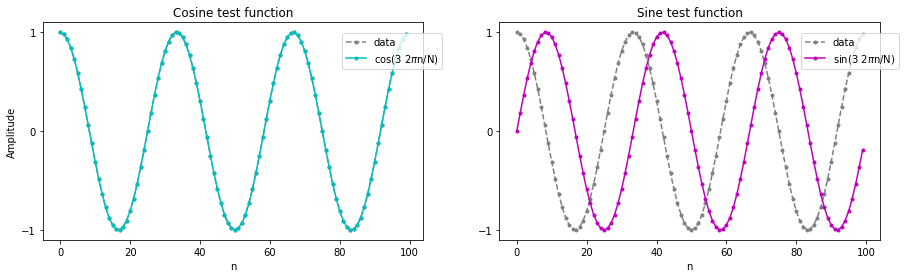

Re(X_k) = 50    Im(X_k) = -1.01863e-14


In [2]:
# TINKER LINE ... TINKER LINE ... TINKER LINE ... TINKER LINE ... TINKER LINE ... 
k = 3           # choose your k! 

# k-test functions, and Re(X_k) and Im(X_k)
ktestcos = np.cos(k*argument);       ReXk =  np.sum(data*ktestcos)
ktestsin = np.sin(k*argument);       ImXk = -np.sum(data*ktestsin)

# plotting
auxf.aux_plot_kcosinesine(k,n,data,ktestcos,ktestsin)
print('Re(X_k) = %g    Im(X_k) = %g'%(ReXk,ImXk))

### Task 2: Decomposition of arbitrarily phased sinusoid

The gray sinusoidal data time series in Task 1 was a pure cosine function. However, a (seismic) signal can have any phase. Here we see that any sinusoid can be decomposed into a linear combination of properly weighted cosine and sine functions.

**TINKER:**
1. _Apply different phase shifts, e.g., `phaseshift = -np.pi/2`, to the orginal data cosine function in gray. The resulting new time series is plotted in red._
2. _Switch the decompose statement from False to True (have `decompose = True`). A model function is plotted in black. In the right panel it is shown how that black model function is decomposed into a cosine and sine function, i.e., the sum of the cyan and magenta curves yields the black curve._
   * _Apply again different phase shifts; can you find a `phaseshift` value for which no fitting model can be found?_
   * _The cosine and sine weights are printed below the figures. **Let's talk about how that relates to the amplitude (and phase) spectrum!**_

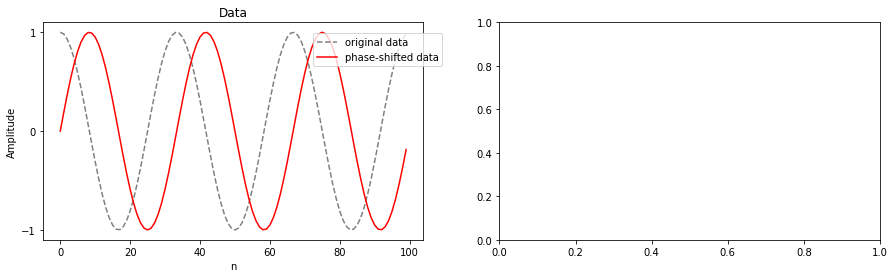

In [3]:
# TINKER LINE ... TINKER LINE ... TINKER LINE ... TINKER LINE ... TINKER LINE ... 
phaseshift = -np.pi/2  # choose phase shift in fraction of pi, play with +/- [pi/8, pi/4, pi/3, pi/2]

newargument = dataargument + phaseshift;    newdata = np.cos(newargument)

decompose = False
auxf.aux_plot_modeldecomposition(n,data,newdata,dataargument,decompose)
#print("The sine- and cosine-weights are %5.3f, %5.3f"%(alpha, beta));

In [4]:
# OLD MATERIAL

'''
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,4))
axes[0].plot(n,data,'.--',color='gray'),            axes[1].plot(n,data,'.--',color='gray')
axes[0].plot(n,ktestcos,'c.-'),                     axes[1].plot(n,ktestsin,'m.-')
axes[0].set_xlabel('Sample'),                       axes[1].set_xlabel('Sample')
axes[0].set_yticks([-1, 0, 1]),                     axes[1].set_yticks([-1, 0, 1])
axes[0].set_title('Cosine test function'),          axes[1].set_title('Sine test function')
axes[0].set_ylabel('Amplitude');                    plt.show()
'''


'''
# never mind some magic ...
# build model vectors based on sine and cosine functions
model_sin = np.sin(dataargument);    model_cos = np.cos(dataargument)
GT = np.concatenate(([model_sin], [model_cos]));             G = GT.T # shape (N,2)
alpha, beta = np.linalg.lstsq(np.matmul(GT,G),np.matmul(GT,newdata),rcond=None)[0]
# alpha and beta are the weights of the sine and cosine basis function
print("The sine- and cosine-weights are %5.3f, %5.3f"%(alpha, beta))
model = alpha * model_sin + beta * model_cos

# plotting
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,4))
axes[0].plot(n,data,'--',color='gray',label='original data');  axes[1].plot(n,alpha*model_sin,'m',label='sine-part')
axes[0].plot(n,newdata,'r-',label='phase-shifted data');       axes[1].plot(n,beta*model_cos,'c',label='cosine-part')
axes[0].plot(n,model,'k--',label='model');                     axes[1].plot(n,model,'k',label='model')
axes[0].set_yticks([-1, 0, 1]);                     axes[1].set_yticks([-1, 0, 1])
axes[0].set_xlabel('Sample');                       axes[1].set_xlabel('Sample')
axes[0].set_title('Data and model');                axes[1].set_title('Model decomposition')
axes[0].set_ylabel('Amplitude');                    
axes[0].legend(bbox_to_anchor=(1.05, 0.95), loc='upper right', borderaxespad=0.)
axes[1].legend(bbox_to_anchor=(1.05, 0.95), loc='upper left', borderaxespad=0.)
plt.show()
'''

'\n# never mind some magic ...\n# build model vectors based on sine and cosine functions\nmodel_sin = np.sin(dataargument);    model_cos = np.cos(dataargument)\nGT = np.concatenate(([model_sin], [model_cos]));             G = GT.T # shape (N,2)\nalpha, beta = np.linalg.lstsq(np.matmul(GT,G),np.matmul(GT,newdata),rcond=None)[0]\n# alpha and beta are the weights of the sine and cosine basis function\nprint("The sine- and cosine-weights are %5.3f, %5.3f"%(alpha, beta))\nmodel = alpha * model_sin + beta * model_cos\n\n# plotting\nfig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,4))\naxes[0].plot(n,data,\'--\',color=\'gray\',label=\'original data\');  axes[1].plot(n,alpha*model_sin,\'m\',label=\'sine-part\')\naxes[0].plot(n,newdata,\'r-\',label=\'phase-shifted data\');       axes[1].plot(n,beta*model_cos,\'c\',label=\'cosine-part\')\naxes[0].plot(n,model,\'k--\',label=\'model\');                     axes[1].plot(n,model,\'k\',label=\'model\')\naxes[0].set_yticks([-1, 0, 1]);            